# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dionesius Diegratia Febrian
- **Email:** dionesius.dfebrian@gmail.com
- **ID Dicoding:** dionesiusdiegratiaf

## Data Wrangling

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (cerah, hujan, atau berkabut) terhadap rata-rata penyewaan sepeda harian pada tahun?
- Pada jam berapa dalam sehari terjadi puncak penyewaan sepeda pada hari kerja dibandingkan akhir pekan selama tahun?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [7]:
from google.colab import files
uploaded = files.upload()

df_day = pd.read_csv('day.csv')
print("Data dari day.csv:")
print(df_day.head())

df_hour = pd.read_csv('hour.csv')
print("\nData dari hour.csv:")
print(df_hour.head())

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv
Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    c

**Insight:**
- Mengunggah dan membaca dataset `day.csv` (data harian) dan `hour.csv` (data per jam) dari komputer menggunakan Google Colab.


### Assessing Data

In [8]:
print("Missing values di day.csv:")
print(df_day.isnull().sum())
print("\nTipe data di day.csv:")
print(df_day.dtypes)
print("\nDuplikat di day.csv:")
print(df_day.duplicated().sum())

print("\nMissing values di hour.csv:")
print(df_hour.isnull().sum())
print("\nTipe data di hour.csv:")
print(df_hour.dtypes)
print("\nDuplikat di hour.csv:")
print(df_hour.duplicated().sum())

Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tipe data di day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Duplikat di day.csv:
0

Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt   

**Insight:**
- Memeriksa kualitas data
- Missing values: Mengecek apakah ada data yang hilang.
- Tipe data: Memastikan tipe data sesuai untuk analisis.
- Duplikat: Mengecek apakah ada baris yang duplikat.

### Cleaning Data

In [9]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])


df_day['cnt'] = df_day['cnt'].fillna(df_day['cnt'].median())
df_hour['cnt'] = df_hour['cnt'].fillna(df_hour['cnt'].median())


**Insight:**
- Data harian (day.csv): Kolom 'dteday' diubah ke format datetime dan missing values di 'cnt' diisi dengan median untuk analisis yang lebih akurat.
- Data per jam (hour.csv): Kolom 'dteday' diubah ke format datetime dan missing values di 'cnt' diisi dengan median untuk konsistensi data

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:

print("Dataframe harian (df_day):")
print(df_day.head())
print("\nDataframe per jam (df_hour):")
print(df_hour.head())

# statistik dasar
print("\nDeskripsi statistik df_day:")
print(df_day.describe())
print("\nDeskripsi statistik df_hour:")
print(df_hour.describe())

# Pengaruh Cuaca terhadap Rata-rata Penyewaan Harian
weather_map = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Berat'}
df_day['weather_desc'] = df_day['weathersit'].map(weather_map)

# agregasi rata-rata penyewaan berdasarkan cuaca
weather_group = df_day.groupby('weather_desc')['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda harian berdasarkan cuaca:")
print(weather_group)

# kolom tipe hari
df_hour['day_type'] = df_hour['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# agregasi rata-rata penyewaan per jam berdasarkan tipe hari
hourly_group = df_hour.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()
print("\nRata-rata penyewaan sepeda per jam berdasarkan tipe hari:")
print(hourly_group)

# jam puncak untuk hari kerja dan akhir pekan
peak_weekday = hourly_group[hourly_group['day_type'] == 'Weekday'].sort_values('cnt', ascending=False).iloc[0]
peak_weekend = hourly_group[hourly_group['day_type'] == 'Weekend'].sort_values('cnt', ascending=False).iloc[0]
print(f"\nJam puncak penyewaan pada hari kerja: Jam {int(peak_weekday['hr'])} dengan rata-rata {peak_weekday['cnt']:.2f}")
print(f"Jam puncak penyewaan pada akhir pekan: Jam {int(peak_weekend['hr'])} dengan rata-rata {peak_weekend['cnt']:.2f}")


Dataframe harian (df_day):
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data

**Insight:**
Menganalisis data untuk menjawab pertanyaan bisnis:
- Deskripsi statistik memberikan gambaran distribusi data

## Visualization & Explanatory Analysis

### Pertanyaan 1:

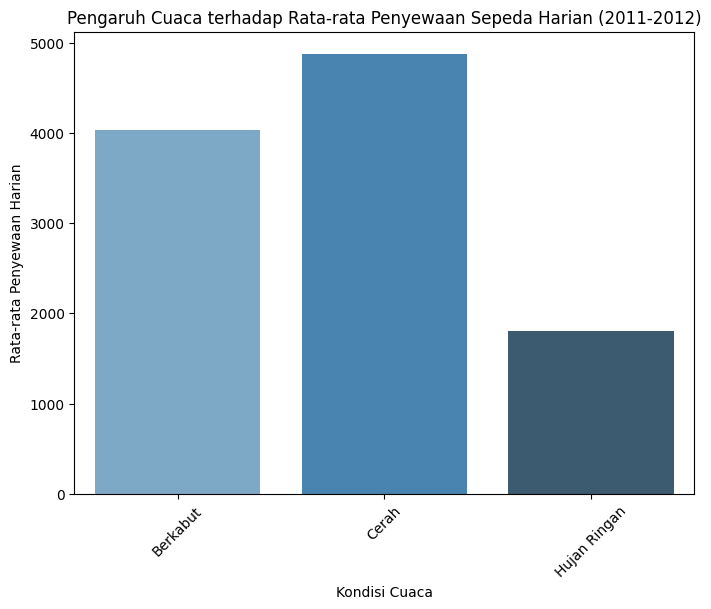

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='weather_desc', y='cnt', hue='weather_desc', data=weather_group, palette='Blues_d', legend=False)
plt.title('Pengaruh Cuaca terhadap Rata-rata Penyewaan Sepeda Harian (2011-2012)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Harian')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

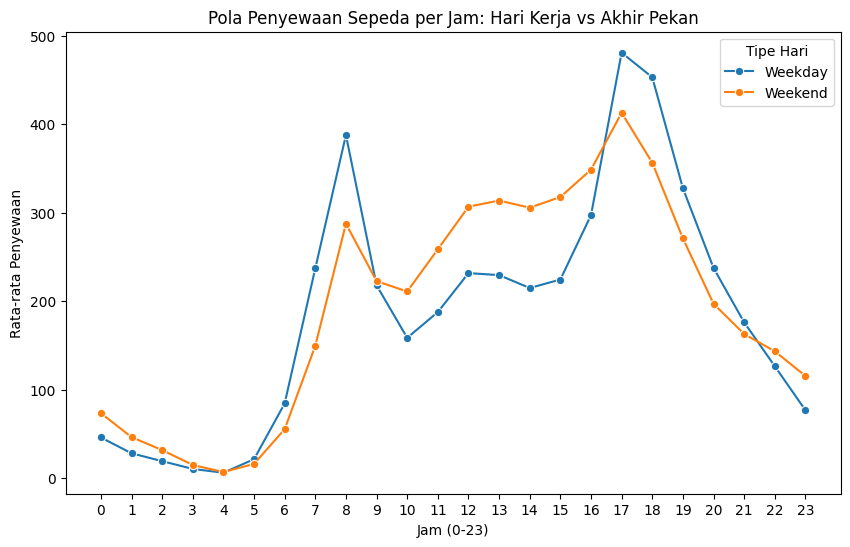

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='day_type', data=hourly_group, marker='o')
plt.title('Pola Penyewaan Sepeda per Jam: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.legend(title='Tipe Hari')
plt.show()

**Insight:**
Membuat visualisasi untuk menjawab pertanyaan bisnis:
- Bar plot untuk Pertanyaan 1: Menampilkan rata-rata penyewaan berdasarkan cuaca dengan warna yang kontras dan label jelas.
- Line plot untuk Pertanyaan 2: Menampilkan pola penyewaan per jam dengan garis berbeda untuk hari kerja dan akhir pekan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis data harian, cuaca cerah atau sedikit berawan (weathersit=1) cenderung memiliki rata-rata penyewaan sepeda harian tertinggi dibandingkan kondisi kabut/berawan (weathersit=2) atau hujan/salju ringan (weathersit=3). Hal ini menunjukkan bahwa kondisi cuaca yang baik mendorong lebih banyak orang untuk menyewa sepeda, sedangkan cuaca buruk mengurangi minat penyewaan.
- Pada hari kerja, puncak penyewaan sepeda terjadi pada jam sibuk pagi dan sore, yang kemungkinan besar terkait dengan aktivitas perjalanan kerja. Sebaliknya, pada akhir pekan, pola penyewaan lebih merata sepanjang hari dengan peningkatan di siang hingga sore hari, mencerminkan penggunaan sepeda untuk rekreasi atau aktivitas santai.